In [25]:
import torch
from matplotlib import pyplot as plt

In [26]:
learning_rate=0.01
x=torch.rand([100,1])
x

tensor([[0.6579],
        [0.7468],
        [0.2324],
        [0.1809],
        [0.3528],
        [0.1963],
        [0.8920],
        [0.6795],
        [0.5727],
        [0.9202],
        [0.7196],
        [0.6843],
        [0.8701],
        [0.8282],
        [0.7497],
        [0.0267],
        [0.4233],
        [0.7774],
        [0.8087],
        [0.8024],
        [0.0397],
        [0.5091],
        [0.6974],
        [0.2934],
        [0.1097],
        [0.5738],
        [0.8216],
        [0.0316],
        [0.3130],
        [0.2832],
        [0.8827],
        [0.2302],
        [0.5720],
        [0.7067],
        [0.8560],
        [0.7557],
        [0.2871],
        [0.3648],
        [0.0590],
        [0.7687],
        [0.8980],
        [0.1530],
        [0.3113],
        [0.1029],
        [0.1204],
        [0.2819],
        [0.0922],
        [0.5315],
        [0.8204],
        [0.7548],
        [0.7219],
        [0.9720],
        [0.1936],
        [0.3581],
        [0.3390],
        [0

In [27]:
y_true=x*3+0.8
y_true

tensor([[2.7736],
        [3.0403],
        [1.4973],
        [1.3427],
        [1.8585],
        [1.3889],
        [3.4760],
        [2.8384],
        [2.5181],
        [3.5606],
        [2.9587],
        [2.8528],
        [3.4104],
        [3.2846],
        [3.0492],
        [0.8801],
        [2.0700],
        [3.1322],
        [3.2260],
        [3.2072],
        [0.9190],
        [2.3272],
        [2.8921],
        [1.6801],
        [1.1292],
        [2.5213],
        [3.2649],
        [0.8947],
        [1.7390],
        [1.6497],
        [3.4480],
        [1.4905],
        [2.5160],
        [2.9200],
        [3.3679],
        [3.0672],
        [1.6613],
        [1.8944],
        [0.9769],
        [3.1061],
        [3.4941],
        [1.2590],
        [1.7338],
        [1.1088],
        [1.1611],
        [1.6458],
        [1.0766],
        [2.3945],
        [3.2613],
        [3.0644],
        [2.9657],
        [3.7159],
        [1.3809],
        [1.8744],
        [1.8170],
        [3

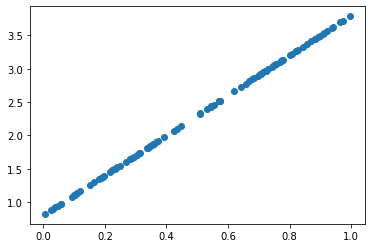

In [28]:
plt.scatter(x.numpy().reshape(-1),y_true.reshape(-1))
plt.show()

C:\Users\loneve\AppData\Local\Temp\ipykernel_4320\3451253933.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes=Axes3D(figure)


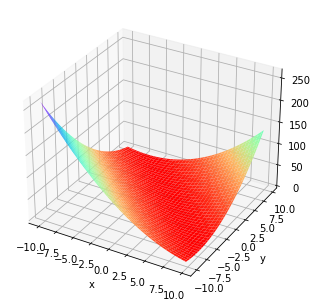

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
figure=plt.figure()
axes=Axes3D(figure)
x=np.arange(-10,10,0.25)
y=np.arange(-10,10,0.25)
x,y=np.meshgrid(x,y)
z=1/2*(3-x-y)**2
axes.plot_surface(x,y,z,cmap='rainbow_r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
w=torch.rand([1,1],requires_grad=True)
w

In [ ]:
b=torch.tensor(0.0,requires_grad=True)
b

In [ ]:
for i in range(10000):
    y_predict=torch.matmul(x,w)+b
    #print(y_predict)
    loss=(y_true-y_predict).pow(2).mean()
    #print(w.grad)

    if w.grad is not None:
        # print(w.grad)
        # print(w.grad.data)
        w.grad.data.zero_()

    if b.grad is not None:
        b.grad.data.zero_()

    loss.backward()
    w.data=w.data-learning_rate*w.grad
    b.data = b.data - learning_rate * b.grad
    print('w,b,loss',w.item(),b.item(),loss)

In [ ]:
y_predict=torch.matmul(x,w)+b
plt.plot(x.numpy().reshape(-1),y_predict.detach().numpy().reshape(-1))
plt.show()

In [17]:
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.optim import SGD


In [18]:
x=torch.rand([500,1])
y_true=3*x**2+8

# x=torch.tensor([[48],[5],[28],[43],[88],[24]],dtype=torch.float)
# y_true=torch.tensor([[12],[64],[55],[16],[46],[37]],dtype=torch.float)

In [19]:
class Myliner(nn.Module):
    def __init__(self):
        super(Myliner,self).__init__()
        #传入特征数量，输出特征数量（传入列数，输出列数）
        self.linear=nn.Linear(1,100)
        self.relu=nn.ReLU()
        self.out=nn.Linear(100,1)
    #默认input，输入x
    def forward(self,x):
        out=self.linear(x)
        out=self.relu(out)
        out=self.out(out)
        return out

In [20]:
myliner=Myliner()
#最优化策略
optimizer=SGD(myliner.parameters(),0.001)
#损失函数
loss_fn=nn.MSELoss()

In [ ]:
for i in range(40000):
    y_predict=myliner(x)
    loss=loss_fn(y_predict,y_true)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%500==0:
        print(loss.item())
        # print(list(myliner.parameters()))
        # print(list(myliner.parameters())[0].size())
        # print(list(myliner.parameters())[1].size())
        # print(list(myliner.parameters())[2].size())

In [ ]:
#设置模式为评估模式，即预测模式
myliner.eval()
predict=myliner(x)
predict=predict.data.numpy()
plt.scatter(x.data.numpy(),y_true.data.numpy(),c='r')
plt.scatter(x.data.numpy(),predict)
plt.show()